In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC 
         
          
          

In [ ]:
data_train = pd.read_csv(r'D:\repos\cookie-classifier\res\data\cookies_train.csv')
data_test = pd.read_csv(r'D:\repos\cookie-classifier\res\data\cookies_test.csv')
print(data_train.shape)
print(data_train.isnull().sum().sum())
data_train.head()

(1738, 134)
0


,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini,class
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cookies
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,Cookies
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cookies
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Cookies


In [3]:
x_train = data_train.iloc[:,:-1] #x sastojci
y_train = data_train.iloc[:,-1] #y klase - kolacici pecivo i pica
x_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,-1]
labels_y = y_train.unique()
print(x_train.isnull().sum().sum())
print(y_train.unique())

0
['Cookies' 'Pastries' 'Pizzas']


In [4]:
data_train_class = data_train.set_index('class').sort_values(by=['class'])
data_train_class.head()

,Italian seasoning,Worcestershire sauce,allspice,almonds,anchovies,anise,apples,apricots,arugula,bacon,...,tortillas,vanilla,vinegar,wafer cookies,walnuts,water,whipping cream,wine,yeast,zucchini
class,,,,,,,,,,,,,,,,,,,,,
Cookies,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cookies,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Cookies,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Cookies,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Cookies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
broj_kolacici_train = np.sum(y_train=='Cookies')
broj_peciva_train = np.sum(y_train=='Pastries')
broj_pica_train = np.sum(y_train=='Pizzas')
print("Cookies: ", broj_kolacici_train)
print("Pastries: ", broj_peciva_train)
print("Pizzas: ", broj_pica_train)

Cookies:  723
Pastries:  619
Pizzas:  396


In [6]:
sumirano_cookies = data_train_class.loc['Cookies'].sum()
sumirano_pastries = data_train_class.loc['Pastries'].sum()
sumirano_pizzas = data_train_class.loc['Pizzas'].sum()
print(sumirano_cookies)
print()
print(sumirano_pastries)
print()
print(sumirano_pizzas)

Italian seasoning        0
Worcestershire sauce     0
allspice                23
almonds                 97
anchovies                0
                        ..
water                   58
whipping cream           8
wine                     0
yeast                    0
zucchini                 0
Length: 133, dtype: int64

Italian seasoning         0
Worcestershire sauce      0
allspice                 21
almonds                  45
anchovies                 0
                       ... 
water                   178
whipping cream            0
wine                     24
yeast                    28
zucchini                  0
Length: 133, dtype: int64

Italian seasoning        23
Worcestershire sauce     10
allspice                  0
almonds                   0
anchovies                 8
                       ... 
water                   139
whipping cream            0
wine                     24
yeast                   147
zucchini                 12
Length: 133, dtype: int64


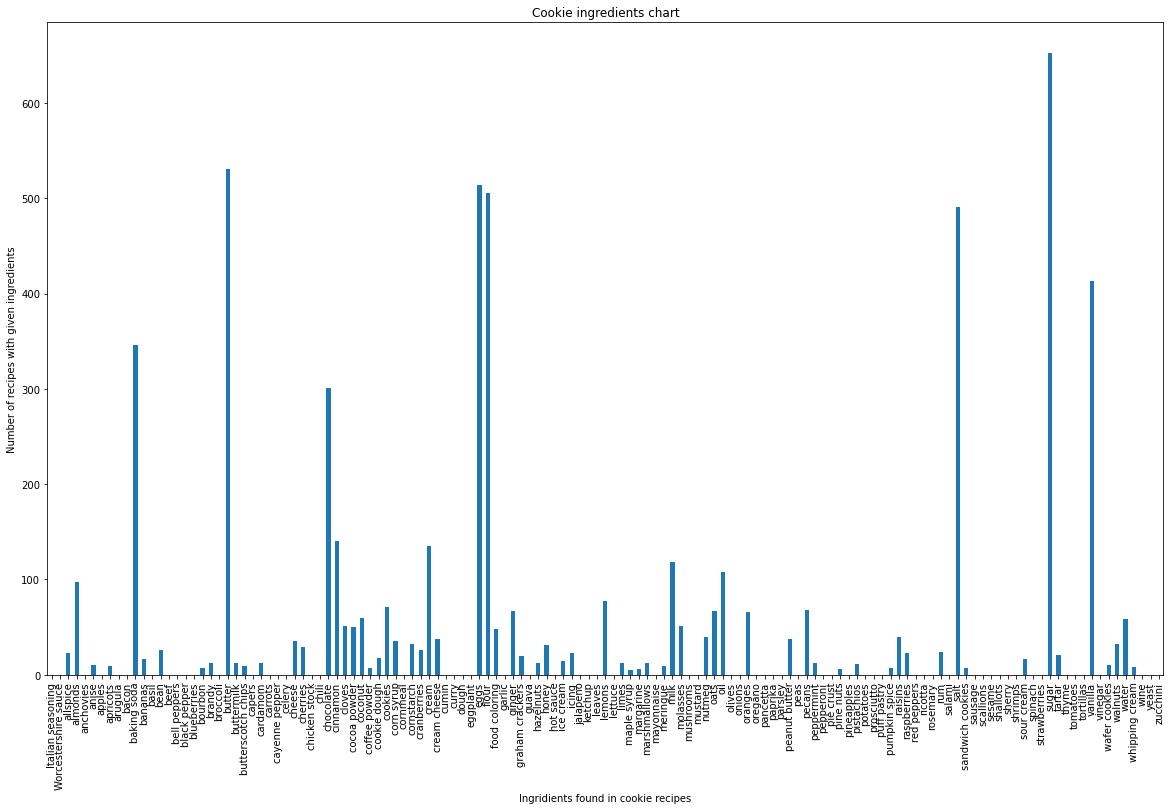

In [7]:
sumirano_cookies.plot(kind='bar', figsize=(20,12), title='Cookie ingredients chart')
plt.xlabel('Ingridients found in cookie recipes');
plt.ylabel('Number of recipes with given ingredients');

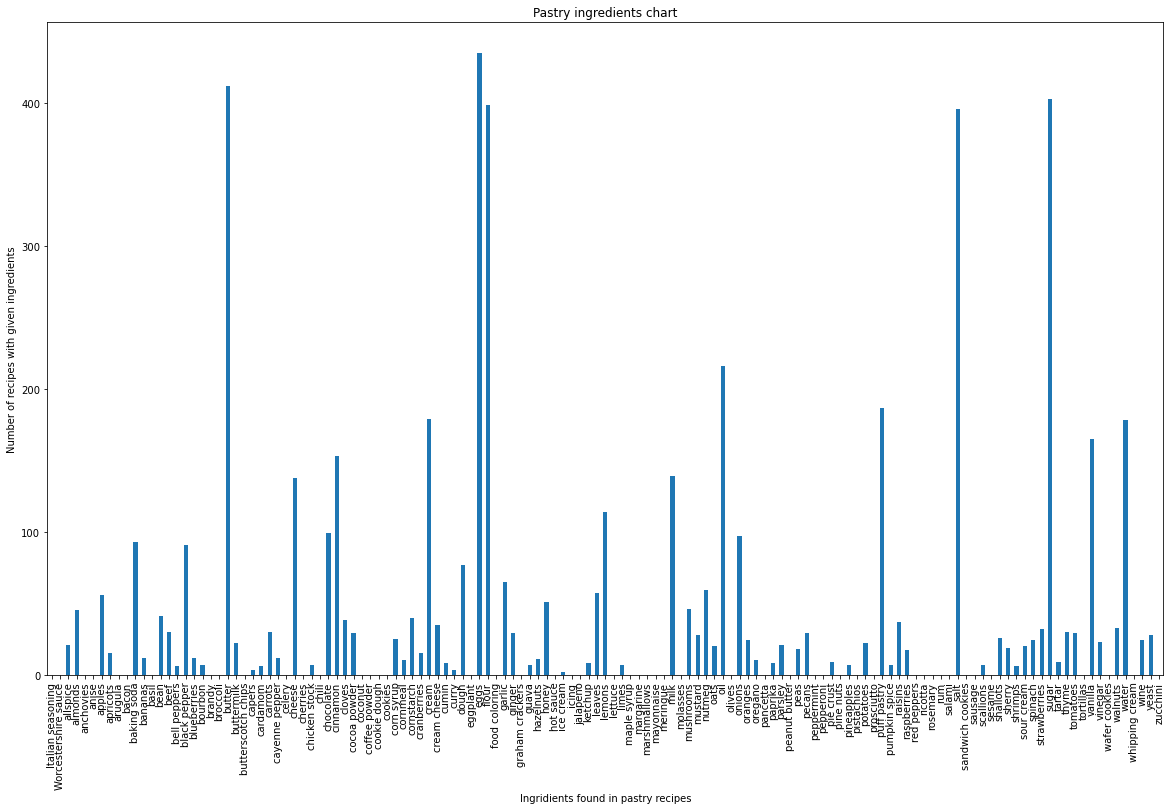

In [8]:
sumirano_pastries.plot(kind='bar', figsize=(20,12), title='Pastry ingredients chart')
plt.xlabel('Ingridients found in pastry recipes');
plt.ylabel('Number of recipes with given ingredients');

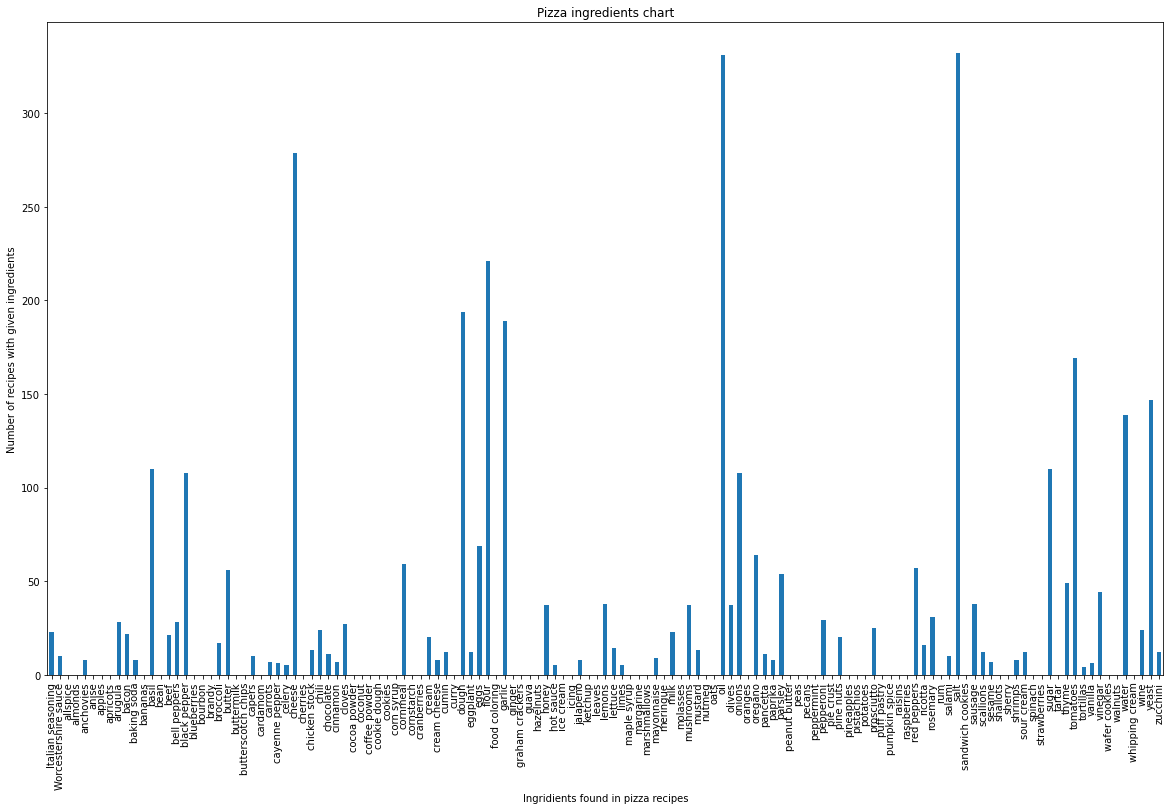

In [9]:
sumirano_pizzas.plot(kind='bar', figsize=(20,12), title='Pizza ingredients chart')
plt.xlabel('Ingridients found in pizza recipes');
plt.ylabel('Number of recipes with given ingredients');

In [10]:
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

In [11]:
def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        osetljivost_i.append(TP/(TP+FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

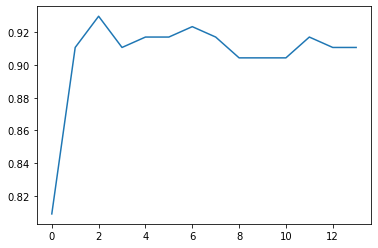

0.9252873563218391


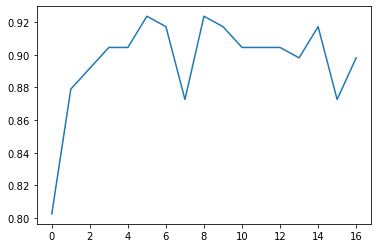

0.9252873563218391


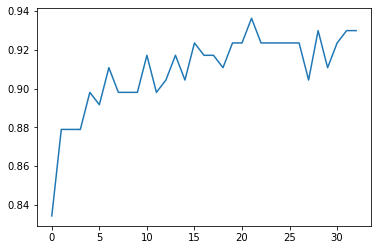

0.9367816091954023


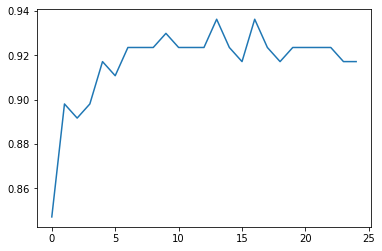

0.9080459770114943


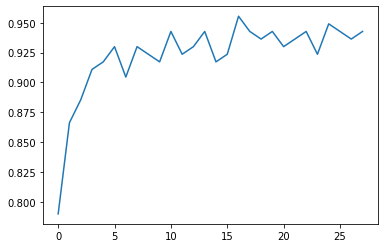

0.9137931034482759


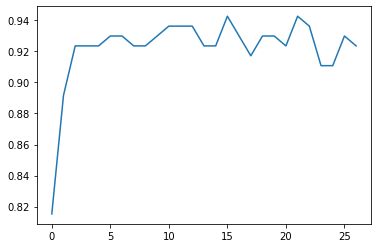

0.8793103448275862


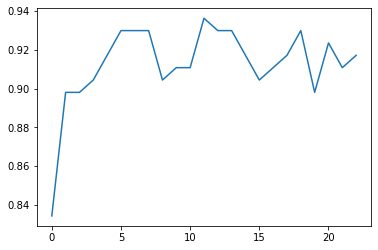

0.9195402298850575


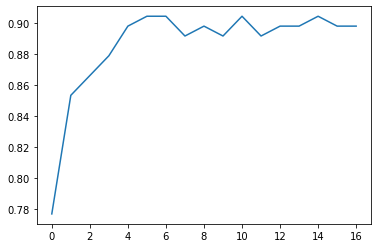

0.9022988505747126


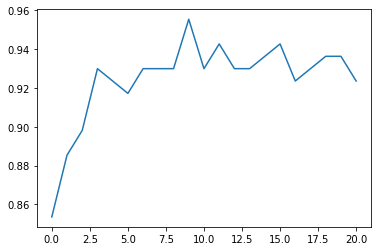

0.9190751445086706


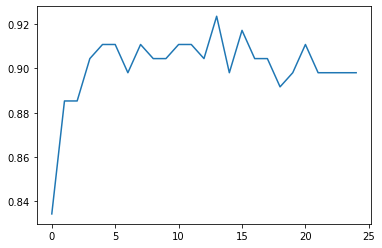

0.9190751445086706
Konacna matrica konfuzije: 
 [[665.  57.   1.]
 [ 63. 547.   9.]
 [  6.  12. 378.]]
Procenat tacno predvidjenih:  0.9148446490218642


In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(x_train, y_train)
acc = []
fin_conf_mat_NN = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred = classifier.predict(x_train.iloc[test_index,:])
    plt.figure
    plt.plot(classifier.validation_scores_)
    plt.show()
    print(accuracy_score(y_train.iloc[test_index], y_pred))
    fin_conf_mat_NN += confusion_matrix(y_train.iloc[test_index], y_pred)
print('Konacna matrica konfuzije: \n', fin_conf_mat_NN)
print('Procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat_NN))/sum(sum(fin_conf_mat_NN)))

In [13]:
print('Prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat_NN, y_train.unique()))

Za klasu  Cookies  tacnost je:  0.92692750287687
Za klasu  Pastries  tacnost je:  0.9188722669735327
Za klasu  Pizzas  tacnost je:  0.9838895281933256
Prosecna tacnost je:  0.9432297660145762


In [14]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat_NN, y_train.unique()))

Za klasu  Cookies  osetljivost je:  0.9197786998616874
Za klasu  Pastries  osetljivost je:  0.8836833602584814
Za klasu  Pizzas  osetljivost je:  0.9545454545454546
prosecna osetljivost je:  0.9193358382218744


<AxesSubplot:>

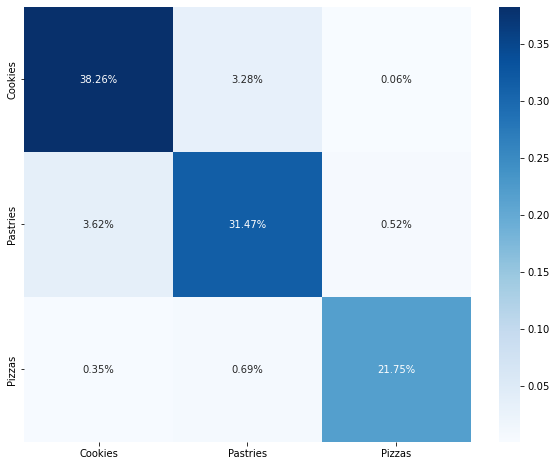

In [15]:
plt.figure(figsize=(10,8))
sb.heatmap(fin_conf_mat_NN/np.sum(fin_conf_mat_NN), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=['Cookies','Pastries','Pizzas'], xticklabels=['Cookies','Pastries','Pizzas'])

In [16]:
rest_ind = y_train.loc[y_train!='Cookies'].index
cookies_ind = y_train.loc[y_train=='Cookies'].index

x_dupl = x_train.iloc[rest_ind,:]
x_duplicated = pd.concat([x_dupl]*2, ignore_index=True)
x_upsample = x_duplicated.append(x_train.iloc[cookies_ind,:], ignore_index=True)

y_dupl = y_train.iloc[rest_ind]
y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
y_upsample = y_duplicated.append(y_train.iloc[cookies_ind], ignore_index=True)
        
print('original X: ', x_train.shape)
print('original y: ', y_train.shape)
print('redukovan X: ', x_upsample.shape)
print('redukovan y: ', y_upsample.shape)
y_upsample.groupby(by=y_upsample).count()

original X:  (1738, 133)
original y:  (1738,)
redukovan X:  (2753, 133)
redukovan y:  (2753,)


class
Cookies      723
Pastries    1238
Pizzas       792
Name: class, dtype: int64

In [2]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


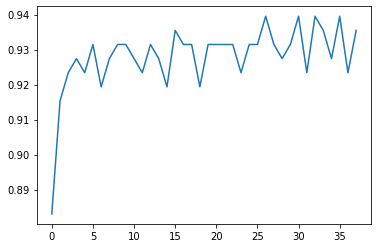

0.9420289855072463


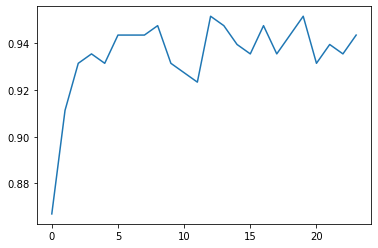

0.9057971014492754


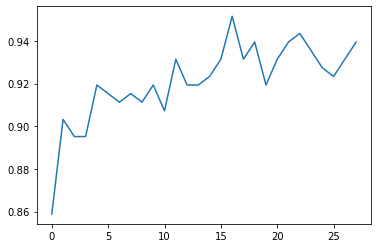

0.9492753623188406


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


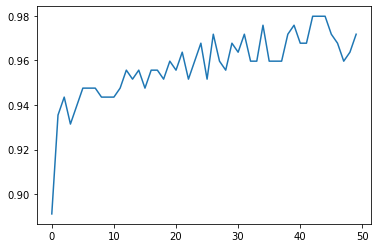

0.96


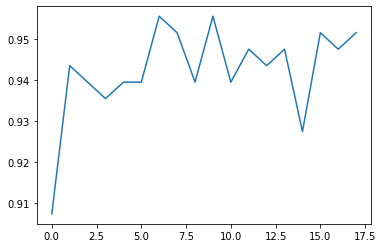

0.9345454545454546


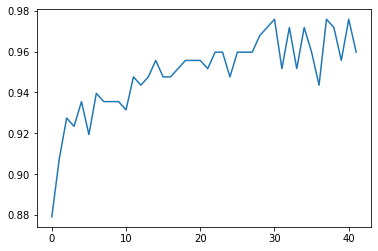

0.9636363636363636


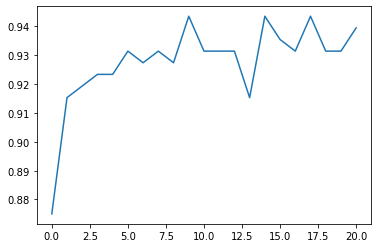

0.92


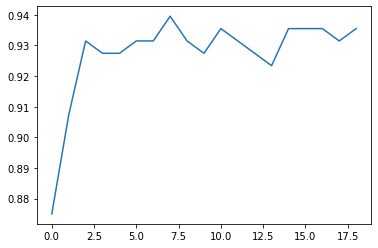

0.9345454545454546


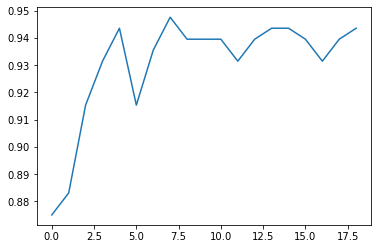

0.9272727272727272


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


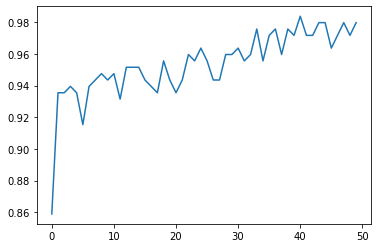

0.96
konacna matrica konfuzije: 
 [[ 651.   70.    2.]
 [  70. 1161.    7.]
 [   8.    9.  775.]]
procenat tacno predvidjenih:  0.9397021431166


In [17]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indexes = kf.split(x_upsample, y_upsample)
acc = []
fin_conf_mat_NN_up = np.zeros((len(np.unique(y_upsample)),len(np.unique(y_upsample))))
for train_index, test_index in indexes:
    classifier = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
    classifier.fit(x_upsample.iloc[train_index,:], y_upsample.iloc[train_index])
    y_pred = classifier.predict(x_upsample.iloc[test_index,:])
    plt.figure
    plt.plot(classifier.validation_scores_)
    plt.show()
    print(accuracy_score(y_upsample.iloc[test_index], y_pred))
    fin_conf_mat_NN_up += confusion_matrix(y_upsample.iloc[test_index], y_pred)
print('konacna matrica konfuzije: \n', fin_conf_mat_NN_up)
print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat_NN_up))/sum(sum(fin_conf_mat_NN_up)))

In [18]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat_NN_up, y_train.unique()))

Za klasu  Cookies  tacnost je:  0.9455139847439157
Za klasu  Pastries  tacnost je:  0.9433345441336723
Za klasu  Pizzas  tacnost je:  0.9905557573556121
prosecna tacnost je:  0.9598014287444


In [19]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat_NN_up, y_train.unique()))

Za klasu  Cookies  osetljivost je:  0.9004149377593361
Za klasu  Pastries  osetljivost je:  0.9378029079159935
Za klasu  Pizzas  osetljivost je:  0.9785353535353535
prosecna osetljivost je:  0.9389177330702276


<AxesSubplot:>

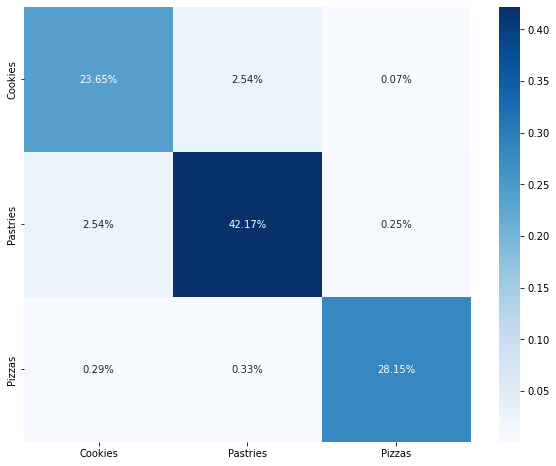

In [20]:
plt.figure(figsize=(10,8))
sb.heatmap(fin_conf_mat_NN_up/np.sum(fin_conf_mat_NN_up), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=['Cookies','Pastries','Pizzas'], xticklabels=['Cookies','Pastries','Pizzas'])

In [21]:
print(fin_conf_mat_NN_up)
TP_kolacici=fin_conf_mat_NN_up[0,0]
TN_kolacici=fin_conf_mat_NN_up[1,1]+fin_conf_mat_NN_up[1,2]+fin_conf_mat_NN_up[2,1]+fin_conf_mat_NN_up[2,2]
FN_kolacici=fin_conf_mat_NN_up[0,1]+fin_conf_mat_NN_up[0,2]
FP_kolacici=fin_conf_mat_NN_up[1,0]+fin_conf_mat_NN_up[2,0]
# TP  FN  FN
# FP  TN  TN
# FP  TN  TN
tacnost_kolacici=(TP_kolacici+TN_kolacici)/(TP_kolacici+TN_kolacici+FP_kolacici+FN_kolacici)
preciznost_kolacici=TP_kolacici/(TP_kolacici+FP_kolacici)
osetljivost_kolacici=TP_kolacici/(TP_kolacici+FN_kolacici)
specificnost_kolacici=TN_kolacici/(TN_kolacici+FP_kolacici)
F_mera_kolacici=2*preciznost_kolacici*osetljivost_kolacici/(preciznost_kolacici+osetljivost_kolacici)


print('Mere uspešnosti za klasu KOLAČIĆI: ')
print('Tačnost: ', tacnost_kolacici)
print('Preciznost: ', preciznost_kolacici)
print('Osetljivost: ', osetljivost_kolacici)
print('Specifičnost: ', specificnost_kolacici)
print('F-mera: ', F_mera_kolacici) 

[[ 651.   70.    2.]
 [  70. 1161.    7.]
 [   8.    9.  775.]]
Mere uspešnosti za klasu KOLAČIĆI: 
Tačnost:  0.9455139847439157
Preciznost:  0.8930041152263375
Osetljivost:  0.9004149377593361
Specifičnost:  0.961576354679803
F-mera:  0.8966942148760331


In [22]:
print(fin_conf_mat_NN_up)
TP_paste=fin_conf_mat_NN_up[1,1]
TN_paste=fin_conf_mat_NN_up[0,0]+fin_conf_mat_NN_up[0,2]+fin_conf_mat_NN_up[2,0]+fin_conf_mat_NN_up[2,2]
FN_paste=fin_conf_mat_NN_up[1,0]+fin_conf_mat_NN_up[1,2]
FP_paste=fin_conf_mat_NN_up[0,1]+fin_conf_mat_NN_up[2,1]
# TN  FP  TN
# FN  TP  FN
# TN  FP  TN
tacnost_paste=(TP_paste+TN_paste)/(TP_paste+TN_paste+FP_paste+FN_paste)
preciznost_paste=TP_paste/(TP_paste+FP_paste)
osetljivost_paste=TP_paste/(TP_paste+FN_paste)
specificnost_paste=TN_paste/(TN_paste+FP_paste)
F_mera_paste=2*preciznost_paste*osetljivost_paste/(preciznost_paste+osetljivost_paste)

print('Mera uspešnosti za klasu PASTE: ')
print('Tačnost: ', tacnost_paste)
print('Preciznost: ', preciznost_paste)
print('Osetljivost: ', osetljivost_paste)
print('Specifičnost: ', specificnost_paste)
print('F-mera: ', F_mera_paste)

[[ 651.   70.    2.]
 [  70. 1161.    7.]
 [   8.    9.  775.]]
Mera uspešnosti za klasu PASTE: 
Tačnost:  0.9433345441336723
Preciznost:  0.9362903225806452
Osetljivost:  0.9378029079159935
Specifičnost:  0.9478547854785478
F-mera:  0.937046004842615


In [23]:
print(fin_conf_mat_NN_up)
TP_pice=fin_conf_mat_NN_up[2,2]
TN_pice=fin_conf_mat_NN_up[0,0]+fin_conf_mat_NN_up[0,1]+fin_conf_mat_NN_up[1,0]+fin_conf_mat_NN_up[1,1]
FN_pice=fin_conf_mat_NN_up[2,0]+fin_conf_mat_NN_up[2,1]
FP_pice=fin_conf_mat_NN_up[0,2]+fin_conf_mat_NN_up[1,2]
# TN  TN  FP
# TN  TN  FP
# FN  FN  TP
tacnost_pice=(TP_pice+TN_pice)/(TP_pice+TN_pice+FP_pice+FN_pice)
preciznost_pice=TP_pice/(TP_pice+FP_pice)
osetljivost_pice=TP_pice/(TP_pice+FN_pice)
specificnost_pice=TN_pice/(TN_pice+FP_pice)
F_mera_pice=2*preciznost_pice*osetljivost_pice/(preciznost_pice+osetljivost_pice)

print('Mera uspešnosti za klasu PICE: ')
print('Tačnost: ', tacnost_pice)
print('preciznost: ', preciznost_pice)
print('Osetljivost: ', osetljivost_pice)
print('Specifičnost: ', specificnost_pice )
print('F-mera: ', F_mera_pice)

[[ 651.   70.    2.]
 [  70. 1161.    7.]
 [   8.    9.  775.]]
Mera uspešnosti za klasu PICE: 
Tačnost:  0.9905557573556121
preciznost:  0.9885204081632653
Osetljivost:  0.9785353535353535
Specifičnost:  0.9954105048444671
F-mera:  0.983502538071066


In [24]:
classifier = MLPClassifier(hidden_layer_sizes=(64,64,64), activation='tanh',
                              solver='adam', batch_size=50, learning_rate='constant', 
                              learning_rate_init=0.001, max_iter=50, shuffle=True,
                              random_state=42, early_stopping=True, n_iter_no_change=10,
                              validation_fraction=0.1, verbose=False)
classifier.fit(x_train, y_train)
y_predvidjeno_konacno_NN = classifier.predict(x_test)
conf_mat_NN_up = confusion_matrix(y_test, y_predvidjeno_konacno_NN, labels=labels_y)
print(conf_mat_NN_up)
print('procenat pogođenih uzoraka je: ', np.trace(conf_mat_NN_up)/sum(sum(conf_mat_NN_up))*100, '%')

[[75  5  0]
 [ 5 64  0]
 [ 2  0 42]]
procenat pogođenih uzoraka je:  93.78238341968913 %


In [25]:
print(conf_mat_NN_up)
TP_kolacici=conf_mat_NN_up[0,0]
TN_kolacici=conf_mat_NN_up[1,1]+conf_mat_NN_up[1,2]+conf_mat_NN_up[2,1]+conf_mat_NN_up[2,2]
FN_kolacici=conf_mat_NN_up[0,1]+conf_mat_NN_up[0,2]
FP_kolacici=conf_mat_NN_up[1,0]+conf_mat_NN_up[2,0]
# TP  FN  FN
# FP  TN  TN
# FP  TN  TN
tacnost_kolacici=(TP_kolacici+TN_kolacici)/(TP_kolacici+TN_kolacici+FP_kolacici+FN_kolacici)
preciznost_kolacici=TP_kolacici/(TP_kolacici+FP_kolacici)
osetljivost_kolacici=TP_kolacici/(TP_kolacici+FN_kolacici)
specificnost_kolacici=TN_kolacici/(TN_kolacici+FP_kolacici)
F_mera_kolacici=2*preciznost_kolacici*osetljivost_kolacici/(preciznost_kolacici+osetljivost_kolacici)


print('Mere uspešnosti za klasu KOLAČIĆI: ')
print('Tačnost: ', tacnost_kolacici)
print('Preciznost: ', preciznost_kolacici)
print('Osetljivost: ', osetljivost_kolacici)
print('Specifičnost: ', specificnost_kolacici)
print('F-mera: ', F_mera_kolacici) 

[[75  5  0]
 [ 5 64  0]
 [ 2  0 42]]
Mere uspešnosti za klasu KOLAČIĆI: 
Tačnost:  0.9378238341968912
Preciznost:  0.9146341463414634
Osetljivost:  0.9375
Specifičnost:  0.9380530973451328
F-mera:  0.925925925925926


In [26]:
print(conf_mat_NN_up)
TP_paste=conf_mat_NN_up[1,1]
TN_paste=conf_mat_NN_up[0,0]+conf_mat_NN_up[0,2]+conf_mat_NN_up[2,0]+conf_mat_NN_up[2,2]
FN_paste=conf_mat_NN_up[1,0]+conf_mat_NN_up[1,2]
FP_paste=conf_mat_NN_up[0,1]+conf_mat_NN_up[2,1]
# TN  FP  TN
# FN  TP  FN
# TN  FP  TN
tacnost_paste=(TP_paste+TN_paste)/(TP_paste+TN_paste+FP_paste+FN_paste)
preciznost_paste=TP_paste/(TP_paste+FP_paste)
osetljivost_paste=TP_paste/(TP_paste+FN_paste)
specificnost_paste=TN_paste/(TN_paste+FP_paste)
F_mera_paste=2*preciznost_paste*osetljivost_paste/(preciznost_paste+osetljivost_paste)

print('Mera uspešnosti za klasu PASTE: ')
print('Tačnost: ', tacnost_paste)
print('Preciznost: ', preciznost_paste)
print('Osetljivost: ', osetljivost_paste)
print('Specifičnost: ', specificnost_paste)
print('F-mera: ', F_mera_paste)

[[75  5  0]
 [ 5 64  0]
 [ 2  0 42]]
Mera uspešnosti za klasu PASTE: 
Tačnost:  0.9481865284974094
Preciznost:  0.927536231884058
Osetljivost:  0.927536231884058
Specifičnost:  0.9596774193548387
F-mera:  0.927536231884058


In [27]:
print(conf_mat_NN_up)
TP_pice=conf_mat_NN_up[2,2]
TN_pice=conf_mat_NN_up[0,0]+conf_mat_NN_up[0,1]+conf_mat_NN_up[1,0]+conf_mat_NN_up[1,1]
FN_pice=conf_mat_NN_up[2,0]+conf_mat_NN_up[2,1]
FP_pice=conf_mat_NN_up[0,2]+conf_mat_NN_up[1,2]
# TN  TN  FP
# TN  TN  FP
# FN  FN  TP
tacnost_pice=(TP_pice+TN_pice)/(TP_pice+TN_pice+FP_pice+FN_pice)
preciznost_pice=TP_pice/(TP_pice+FP_pice)
osetljivost_pice=TP_pice/(TP_pice+FN_pice)
specificnost_pice=TN_pice/(TN_pice+FP_pice)
F_mera_pice=2*preciznost_pice*osetljivost_pice/(preciznost_pice+osetljivost_pice)

print('Mera uspešnosti za klasu PICE: ')
print('Tačnost: ', tacnost_pice)
print('preciznost: ', preciznost_pice)
print('Osetljivost: ', osetljivost_pice)
print('Specifičnost: ', specificnost_pice)
print('F-mera: ', F_mera_pice)

[[75  5  0]
 [ 5 64  0]
 [ 2  0 42]]
Mera uspešnosti za klasu PICE: 
Tačnost:  0.9896373056994818
preciznost:  1.0
Osetljivost:  0.9545454545454546
Specifičnost:  1.0
F-mera:  0.9767441860465117


In [29]:
prosecna_tacnost_klasifikatora=(tacnost_kolacici+tacnost_paste+tacnost_pice)/3
mikro_preciznost_klasifikatora=(TP_kolacici+TP_paste+TP_pice)/(TP_kolacici+TP_paste+TP_pice+FP_kolacici+FP_paste+FP_pice)
mikro_osetljivost_klasifikatora=(TP_kolacici+TP_paste+TP_pice)/(TP_kolacici+TP_paste+TP_pice+FN_kolacici+FN_paste+FN_pice)
mikro_f_mera_klasifikatora=(2*mikro_preciznost_klasifikatora*mikro_osetljivost_klasifikatora)/(mikro_preciznost_klasifikatora+mikro_osetljivost_klasifikatora)
makro_preciznost_klasifikatora=(preciznost_kolacici+preciznost_paste+preciznost_pice)/3
makro_osetljivost_klasifikatora=(osetljivost_kolacici+osetljivost_paste+osetljivost_pice)/3
makro_f_mera_klasifikatora=(2*makro_preciznost_klasifikatora*makro_osetljivost_klasifikatora)/(makro_preciznost_klasifikatora+makro_osetljivost_klasifikatora)

print('Mera uspešnosti klasifikatora: ')
print('Prosečna tačnost: ',prosecna_tacnost_klasifikatora)
print('Mikro preciznost klasifikatora:',mikro_preciznost_klasifikatora)
print('Mikro F-mera klasifikatora:',mikro_f_mera_klasifikatora)
print('Makro preciznost klasifikatora:',makro_preciznost_klasifikatora)
print('Makro F-mera klasifikatora:',makro_f_mera_klasifikatora)
print('Procenat pogođenih uzoraka je: ', np.trace(conf_mat_NN_up)/sum(sum(conf_mat_NN_up))*100, '%')

Mera uspešnosti klasifikatora: 
Prosečna tačnost:  0.9585492227979274
Mikro preciznost klasifikatora: 0.9378238341968912
Mikro F-mera klasifikatora: 0.9378238341968912
Makro preciznost klasifikatora: 0.9473901260751738
Makro F-mera klasifikatora: 0.9436103237588395
Procenat pogođenih uzoraka je:  93.78238341968913 %


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('procenat pogodjenih uzoraka: ', accuracy_score(data_test.iloc[:,-1], y_predvidjeno_konacno_NN))
print('preciznost mikro: ', precision_score(data_test.iloc[:,-1], y_predvidjeno_konacno_NN, average='micro'))
print('preciznost makro: ', precision_score(data_test.iloc[:,-1], y_predvidjeno_konacno_NN, average='macro'))
print('osetljivost mikro: ', recall_score(data_test.iloc[:,-1], y_predvidjeno_konacno_NN, average='micro'))
print('osetljivost makro: ', recall_score(data_test.iloc[:,-1], y_predvidjeno_konacno_NN, average='macro'))
print('f mera mikro: ', f1_score(data_test.iloc[:,-1], y_predvidjeno_konacno_NN, average='micro'))
print('f mera makro: ', f1_score(data_test.iloc[:,-1], y_predvidjeno_konacno_NN, average='macro'))

procenat pogodjenih uzoraka:  0.9378238341968912
preciznost mikro:  0.9378238341968912
preciznost makro:  0.9473901260751738
osetljivost mikro:  0.9378238341968912
osetljivost makro:  0.9398605621431709
f mera mikro:  0.9378238341968912
f mera makro:  0.9434021146188319


In [33]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for c in [1, 10, 100]:
    for F in ['linear', 'rbf', 'poly','sigmoid']:
        for mc in ['ovo', 'ovr']:
            for cw in [None,'balanced']:
                indexes = kf.split(x_train, y_train)
                acc_tmp = []
                fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
                for train_index, test_index in indexes:
                    classifier = SVC(C=c, kernel=F, decision_function_shape=mc)
                    classifier.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
                    y_pred = classifier.predict(x_train.iloc[test_index,:])
                    acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=labels_y)
                print('za parametre C=', c, ', kernel=', F, ' i pristup ', mc, ' tacnost je: ', np.mean(acc_tmp),
                      ' a mat. konf. je:')
                print(fin_conf_mat)
                acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

za parametre C= 1 , kernel= linear  i pristup  ovo  tacnost je:  0.9102352003189157  a mat. konf. je:
[[678.  45.   0.]
 [ 81. 526.  12.]
 [  7.  11. 378.]]
za parametre C= 1 , kernel= linear  i pristup  ovo  tacnost je:  0.9102352003189157  a mat. konf. je:
[[678.  45.   0.]
 [ 81. 526.  12.]
 [  7.  11. 378.]]
za parametre C= 1 , kernel= linear  i pristup  ovr  tacnost je:  0.9102352003189157  a mat. konf. je:
[[678.  45.   0.]
 [ 81. 526.  12.]
 [  7.  11. 378.]]
za parametre C= 1 , kernel= linear  i pristup  ovr  tacnost je:  0.9102352003189157  a mat. konf. je:
[[678.  45.   0.]
 [ 81. 526.  12.]
 [  7.  11. 378.]]
za parametre C= 1 , kernel= rbf  i pristup  ovo  tacnost je:  0.9102418443957211  a mat. konf. je:
[[691.  32.   0.]
 [ 90. 518.  11.]
 [  7.  16. 373.]]
za parametre C= 1 , kernel= rbf  i pristup  ovo  tacnost je:  0.9102418443957211  a mat. konf. je:
[[691.  32.   0.]
 [ 90. 518.  11.]
 [  7.  16. 373.]]
za parametre C= 1 , kernel= rbf  i pristup  ovr  tacnost je:  0.

In [34]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
indeksi = kf.split(x_train, y_train)

fin_conf_mat_SVM = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, test_index in indeksi:
    classifier = SVC(C=10, kernel='rbf', decision_function_shape='ovo', break_ties=False)
    classifier.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])               
    y_predicted = classifier.predict(x_train.iloc[test_index,:])#validacija
    conf_mat = confusion_matrix(y_train.iloc[test_index], y_predicted)
    fin_conf_mat_SVM += conf_mat
print('finalna matrica za SVM je: ')
print(fin_conf_mat_SVM)
print('procenat pogođenih uzoraka je: ', np.trace(fin_conf_mat_SVM)/sum(sum(fin_conf_mat_SVM))*100, '%')


finalna matrica za SVM je: 
[[672.  51.   0.]
 [ 49. 559.  11.]
 [ 10.  13. 373.]]
procenat pogođenih uzoraka je:  92.28998849252014 %


In [35]:
print(fin_conf_mat_SVM)
TP_kolacici=fin_conf_mat_SVM[0,0]
TN_kolacici=fin_conf_mat_SVM[1,1]+fin_conf_mat_SVM[1,2]+fin_conf_mat_SVM[2,1]+fin_conf_mat_SVM[2,2]
FN_kolacici=fin_conf_mat_SVM[0,1]+fin_conf_mat_SVM[0,2]
FP_kolacici=fin_conf_mat_SVM[1,0]+fin_conf_mat_SVM[2,0]
# TP  FN  FN
# FP  TN  TN
# FP  TN  TN
tacnost_kolacici=(TP_kolacici+TN_kolacici)/(TP_kolacici+TN_kolacici+FP_kolacici+FN_kolacici)
preciznost_kolacici=TP_kolacici/(TP_kolacici+FP_kolacici)
osetljivost_kolacici=TP_kolacici/(TP_kolacici+FN_kolacici)
specificnost_kolacici=TN_kolacici/(TN_kolacici+FP_kolacici)
F_mera_kolacici=2*preciznost_kolacici*osetljivost_kolacici/(preciznost_kolacici+osetljivost_kolacici)


print('Mere uspešnosti za klasu KOLAČIĆI: ')
print('Tačnost: ', tacnost_kolacici)
print('Preciznost: ', preciznost_kolacici)
print('Osetljivost: ', osetljivost_kolacici)
print('Specifičnost: ', specificnost_kolacici)
print('F-mera: ', F_mera_kolacici) 

[[672.  51.   0.]
 [ 49. 559.  11.]
 [ 10.  13. 373.]]
Mere uspešnosti za klasu KOLAČIĆI: 
Tačnost:  0.9367088607594937
Preciznost:  0.9192886456908345
Osetljivost:  0.9294605809128631
Specifičnost:  0.941871921182266
F-mera:  0.9243466299862448


In [36]:
print(fin_conf_mat_SVM)
TP_paste=fin_conf_mat_SVM[1,1]
TN_paste=fin_conf_mat_SVM[0,0]+fin_conf_mat_SVM[0,2]+fin_conf_mat_SVM[2,0]+fin_conf_mat_SVM[2,2]
FN_paste=fin_conf_mat_SVM[1,0]+fin_conf_mat_SVM[1,2]
FP_paste=fin_conf_mat_SVM[0,1]+fin_conf_mat_SVM[2,1]
# TN  FP  TN
# FN  TP  FN
# TN  FP  TN
tacnost_paste=(TP_paste+TN_paste)/(TP_paste+TN_paste+FP_paste+FN_paste)
preciznost_paste=TP_paste/(TP_paste+FP_paste)
osetljivost_paste=TP_paste/(TP_paste+FN_paste)
specificnost_paste=TN_paste/(TN_paste+FP_paste)
F_mera_paste=2*preciznost_paste*osetljivost_paste/(preciznost_paste+osetljivost_paste)

print('Mera uspešnosti za klasu PASTE: ')
print('Tačnost: ', tacnost_paste)
print('Preciznost: ', preciznost_paste)
print('Osetljivost: ', osetljivost_paste)
print('Specifičnost: ', specificnost_paste)
print('F-mera: ', F_mera_paste)

[[672.  51.   0.]
 [ 49. 559.  11.]
 [ 10.  13. 373.]]
Mera uspešnosti za klasu PASTE: 
Tačnost:  0.9286536248561565
Preciznost:  0.8972712680577849
Osetljivost:  0.9030694668820679
Specifičnost:  0.9428060768543343
F-mera:  0.9001610305958133


In [37]:
print(fin_conf_mat_SVM)
TP_pice=fin_conf_mat_SVM[2,2]
TN_pice=fin_conf_mat_SVM[0,0]+fin_conf_mat_SVM[0,1]+fin_conf_mat_SVM[1,0]+fin_conf_mat_SVM[1,1]
FN_pice=fin_conf_mat_SVM[2,0]+fin_conf_mat_SVM[2,1]
FP_pice=fin_conf_mat_SVM[0,2]+fin_conf_mat_SVM[1,2]
# TN  TN  FP
# TN  TN  FP
# FN  FN  TP
tacnost_pice=(TP_pice+TN_pice)/(TP_pice+TN_pice+FP_pice+FN_pice)
preciznost_pice=TP_pice/(TP_pice+FP_pice)
osetljivost_pice=TP_pice/(TP_pice+FN_pice)
specificnost_pice=TN_pice/(TN_pice+FP_pice)
F_mera_pice=2*preciznost_pice*osetljivost_pice/(preciznost_pice+osetljivost_pice)

print('Mera uspešnosti za klasu PICE: ')
print('Tačnost: ', tacnost_pice)
print('preciznost: ', preciznost_pice)
print('Osetljivost: ', osetljivost_pice)
print('Specifičnost: ', specificnost_pice )
print('F-mera: ', F_mera_pice)

[[672.  51.   0.]
 [ 49. 559.  11.]
 [ 10.  13. 373.]]
Mera uspešnosti za klasu PICE: 
Tačnost:  0.9804372842347526
preciznost:  0.9713541666666666
Osetljivost:  0.9419191919191919
Specifičnost:  0.9918032786885246
F-mera:  0.9564102564102563


In [39]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat_SVM, y_train.unique()))

Za klasu  Cookies  tacnost je:  0.9367088607594937
Za klasu  Pastries  tacnost je:  0.9286536248561565
Za klasu  Pizzas  tacnost je:  0.9804372842347526
prosecna tacnost je:  0.9485999232834675


In [40]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat_SVM, y_train.unique()))

Za klasu  Cookies  osetljivost je:  0.9294605809128631
Za klasu  Pastries  osetljivost je:  0.9030694668820679
Za klasu  Pizzas  osetljivost je:  0.9419191919191919
prosecna osetljivost je:  0.924816413238041


In [42]:
konacno_SVM = SVC(C=10, kernel='rbf', decision_function_shape='ovo',break_ties=False)
konacno_SVM.fit(x_train, y_train)
y_predvidjeno_svm_konacno=konacno_SVM.predict(x_test)
conf_mat_SVM = confusion_matrix(y_test, y_predvidjeno_svm_konacno)
print(conf_mat_SVM)
print('procenat pogođenih uzoraka je: ', np.trace(conf_mat_SVM)/sum(sum(conf_mat_SVM))*100, '%')

[[78  2  0]
 [ 2 67  0]
 [ 3  0 41]]
procenat pogođenih uzoraka je:  96.37305699481865 %


In [43]:
print(conf_mat_SVM)
TP_kolacici=conf_mat_SVM[0,0]
TN_kolacici=conf_mat_SVM[1,1]+conf_mat_SVM[1,2]+conf_mat_SVM[2,1]+conf_mat_SVM[2,2]
FN_kolacici=conf_mat_SVM[0,1]+conf_mat_SVM[0,2]
FP_kolacici=conf_mat_SVM[1,0]+conf_mat_SVM[2,0]
# TP  FN  FN
# FP  TN  TN
# FP  TN  TN
tacnost_kolacici=(TP_kolacici+TN_kolacici)/(TP_kolacici+TN_kolacici+FP_kolacici+FN_kolacici)
preciznost_kolacici=TP_kolacici/(TP_kolacici+FP_kolacici)
osetljivost_kolacici=TP_kolacici/(TP_kolacici+FN_kolacici)
specificnost_kolacici=TN_kolacici/(TN_kolacici+FP_kolacici)
F_mera_kolacici=2*preciznost_kolacici*osetljivost_kolacici/(preciznost_kolacici+osetljivost_kolacici)


print('Mere uspešnosti za klasu KOLAČIĆI: ')
print('Tačnost: ', tacnost_kolacici)
print('Preciznost: ', preciznost_kolacici)
print('Osetljivost: ', osetljivost_kolacici)
print('Specifičnost: ', specificnost_kolacici)
print('F-mera: ', F_mera_kolacici) 

[[78  2  0]
 [ 2 67  0]
 [ 3  0 41]]
Mere uspešnosti za klasu KOLAČIĆI: 
Tačnost:  0.9637305699481865
Preciznost:  0.9397590361445783
Osetljivost:  0.975
Specifičnost:  0.9557522123893806
F-mera:  0.9570552147239264


In [44]:
print(conf_mat_SVM)
TP_paste=conf_mat_SVM[1,1]
TN_paste=conf_mat_SVM[0,0]+conf_mat_SVM[0,2]+conf_mat_SVM[2,0]+conf_mat_SVM[2,2]
FN_paste=conf_mat_SVM[1,0]+conf_mat_SVM[1,2]
FP_paste=conf_mat_SVM[0,1]+conf_mat_SVM[2,1]
# TN  FP  TN
# FN  TP  FN
# TN  FP  TN
tacnost_paste=(TP_paste+TN_paste)/(TP_paste+TN_paste+FP_paste+FN_paste)
preciznost_paste=TP_paste/(TP_paste+FP_paste)
osetljivost_paste=TP_paste/(TP_paste+FN_paste)
specificnost_paste=TN_paste/(TN_paste+FP_paste)
F_mera_paste=2*preciznost_paste*osetljivost_paste/(preciznost_paste+osetljivost_paste)

print('Mera uspešnosti za klasu PASTE: ')
print('Tačnost: ', tacnost_paste)
print('Preciznost: ', preciznost_paste)
print('Osetljivost: ', osetljivost_paste)
print('Specifičnost: ', specificnost_paste)
print('F-mera: ', F_mera_paste)

[[78  2  0]
 [ 2 67  0]
 [ 3  0 41]]
Mera uspešnosti za klasu PASTE: 
Tačnost:  0.9792746113989638
Preciznost:  0.9710144927536232
Osetljivost:  0.9710144927536232
Specifičnost:  0.9838709677419355
F-mera:  0.9710144927536232


In [45]:
print(conf_mat_SVM)
TP_pice=conf_mat_SVM[2,2]
TN_pice=conf_mat_SVM[0,0]+conf_mat_SVM[0,1]+conf_mat_SVM[1,0]+conf_mat_SVM[1,1]
FN_pice=conf_mat_SVM[2,0]+conf_mat_SVM[2,1]
FP_pice=conf_mat_SVM[0,2]+conf_mat_SVM[1,2]
# TN  TN  FP
# TN  TN  FP
# FN  FN  TP
tacnost_pice=(TP_pice+TN_pice)/(TP_pice+TN_pice+FP_pice+FN_pice)
preciznost_pice=TP_pice/(TP_pice+FP_pice)
osetljivost_pice=TP_pice/(TP_pice+FN_pice)
specificnost_pice=TN_pice/(TN_pice+FP_pice)
F_mera_pice=2*preciznost_pice*osetljivost_pice/(preciznost_pice+osetljivost_pice)

print('Mera uspešnosti za klasu PICE: ')
print('Tačnost: ', tacnost_pice)
print('preciznost: ', preciznost_pice)
print('Osetljivost: ', osetljivost_pice)
print('Specifičnost: ', specificnost_pice)
print('F-mera: ', F_mera_pice)

[[78  2  0]
 [ 2 67  0]
 [ 3  0 41]]
Mera uspešnosti za klasu PICE: 
Tačnost:  0.9844559585492227
preciznost:  1.0
Osetljivost:  0.9318181818181818
Specifičnost:  1.0
F-mera:  0.9647058823529412


In [46]:
prosecna_tacnost_klasifikatora=(tacnost_kolacici+tacnost_paste+tacnost_pice)/3
mikro_preciznost_klasifikatora=(TP_kolacici+TP_paste+TP_pice)/(TP_kolacici+TP_paste+TP_pice+FP_kolacici+FP_paste+FP_pice)
mikro_osetljivost_klasifikatora=(TP_kolacici+TP_paste+TP_pice)/(TP_kolacici+TP_paste+TP_pice+FN_kolacici+FN_paste+FN_pice)
mikro_f_mera_klasifikatora=(2*mikro_preciznost_klasifikatora*mikro_osetljivost_klasifikatora)/(mikro_preciznost_klasifikatora+mikro_osetljivost_klasifikatora)
makro_preciznost_klasifikatora=(preciznost_kolacici+preciznost_paste+preciznost_pice)/3
makro_osetljivost_klasifikatora=(osetljivost_kolacici+osetljivost_paste+osetljivost_pice)/3
makro_f_mera_klasifikatora=(2*makro_preciznost_klasifikatora*makro_osetljivost_klasifikatora)/(makro_preciznost_klasifikatora+makro_osetljivost_klasifikatora)

print('Mera uspešnosti klasifikatora: ')
print('Prosečna tačnost: ',prosecna_tacnost_klasifikatora)
print('Mikro preciznost klasifikatora:',mikro_preciznost_klasifikatora)
print('Mikro F-mera klasifikatora:',mikro_f_mera_klasifikatora)
print('Makro preciznost klasifikatora:',makro_preciznost_klasifikatora)
print('Makro F-mera klasifikatora:',makro_f_mera_klasifikatora)
print('Procenat pogođenih uzoraka je: ', np.trace(conf_mat_SVM)/sum(sum(conf_mat_SVM))*100, '%')

Mera uspešnosti klasifikatora: 
Prosečna tačnost:  0.9758203799654576
Mikro preciznost klasifikatora: 0.9637305699481865
Mikro F-mera klasifikatora: 0.9637305699481865
Makro preciznost klasifikatora: 0.9702578429660672
Makro F-mera klasifikatora: 0.9647364581731217
Procenat pogođenih uzoraka je:  96.37305699481865 %


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('procenat pogodjenih uzoraka: ', accuracy_score(data_test.iloc[:,-1], y_predvidjeno_svm_konacno))
print('preciznost mikro: ', precision_score(data_test.iloc[:,-1], y_predvidjeno_svm_konacno, average='micro'))
print('preciznost makro: ', precision_score(data_test.iloc[:,-1], y_predvidjeno_svm_konacno, average='macro'))
print('osetljivost mikro: ', recall_score(data_test.iloc[:,-1], y_predvidjeno_svm_konacno, average='micro'))
print('osetljivost makro: ', recall_score(data_test.iloc[:,-1], y_predvidjeno_svm_konacno, average='macro'))
print('f mera mikro: ', f1_score(data_test.iloc[:,-1], y_predvidjeno_svm_konacno, average='micro'))
print('f mera makro: ', f1_score(data_test.iloc[:,-1], y_predvidjeno_svm_konacno, average='macro'))

procenat pogodjenih uzoraka:  0.9637305699481865
preciznost mikro:  0.9637305699481865
preciznost makro:  0.9702578429660672
osetljivost mikro:  0.9637305699481865
osetljivost makro:  0.9592775581906016
f mera mikro:  0.9637305699481865
f mera makro:  0.964258529943497
